In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
#from sklearn.metrics import plot_confusion_matrix as pcm
#from sklearn.metrics import plot_precision_recall_curve as ppc
#from sklearn.metrics import plot_roc_curve as prc
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import cross_val_score as cv
from sklearn.svm import LinearSVC as linSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from matplotlib import pyplot as plt  
import numpy as np
from sklearn.preprocessing import Normalizer as norm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.utils.class_weight import compute_class_weight
from sklearn.cluster import KMeans

In [2]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [3]:
from sklearn.cluster import MeanShift
from sklearn.neural_network import MLPClassifier

In [4]:
#loading data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
y_train = y_train['Expected']
y_test = pd.read_csv('y_test_pred_dectree_md2.csv')
X_test = pd.read_csv('X_test.csv')
y_test = y_test['Predicted']
df = X_train

In [5]:
def prep_func(df):
    df_noId = df.drop(['Id'], axis=1)
    sparse_attributes = ['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']
    histo_features = ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']
    histo_dic = {'histo_ag':['ag_000','ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009'], 'histo_ay':['ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009'], 'histo_az':['az_000','az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009'],'histo_ba':['ba_000','ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009'],'histo_cn':['cn_000','cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009'],'histo_cs' :['cs_000','cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009'],'histo_ee': ['ee_000','ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']}
    
    df_lessAtt = df_noId.drop(sparse_attributes, axis=1)
    new_atts_ordinal=[]
    
    for i in histo_dic:  
        #att1=df[histo_dic[i]].max(axis=1)
        att2=df[histo_dic[i]].idxmax(axis="columns")

        #name1 = i + '_val'
        name2 = i + '_mode'
        #se1 = pd.Series(att1)
        se2 = pd.Series(att2)
        #df_lessAtt[name1] = se1.values
        df_lessAtt[name2] = se2.values
        new_atts_ordinal.append(name2)
    
    df_lessAtt[new_atts_ordinal] = df_lessAtt[new_atts_ordinal].fillna('000')
    
    for i in new_atts_ordinal:
        ss=[]
        for j in range(len(df_lessAtt)):
            s=df_lessAtt[i].loc[j][-1]
            ss.append(s)
        df_lessAtt[i]=ss
    
    #df_noHisto = df_lessAtt.drop(histo_features, axis=1)
    
    df_imp1=df_lessAtt.fillna(df_lessAtt.iloc[:,0:92].mean())
    df_imp2 = df_imp1.fillna(0)
    df_f = df_imp2
    return df_f

In [6]:
def half_prep_func(df):
    df_noId = df.drop(['Id'], axis=1)
    sparse_attributes = ['ab_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']
    df_lessAtt = df_noId.drop(sparse_attributes, axis=1)
    df_imp=df_lessAtt.fillna(df_lessAtt.median())
    df_f = df_imp
    return df_f

In [22]:
X_train_p = prep_func(X_train)

In [9]:
#X_train_p = X_train.fillna(X_train.median())

In [23]:
X_test_p = prep_func(X_test)

In [10]:
#X_test_p = X_test.fillna(X_test.median())

Class 0: 39178
Class 1: 722
Proportion: 54.26 : 1


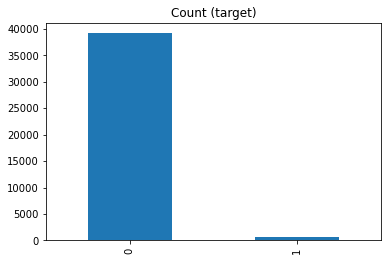

In [10]:
target_count = y_train.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [190]:
#X_test_p = X_test.fillna(X_test.median())

In [33]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_train_p, y_train, test_size=0.33, random_state=42)

In [ ]:
clf = MeanShift(bandwidth=2)
kmeans = clf.fit(X_train_p).predict(X_train_p)
fbeta_score(kmeans, y_train, beta = 3)

In [ ]:
clf = ComplementNB()
pipe = make_pipeline(clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_trainS, y_trainS, cv=it, scoring = fthree_scorer)
print(cv_results)

In [73]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1000000000)
pipe = make_pipeline(clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_trainS, y_trainS, cv=it, scoring = fthree_scorer)
print(cv_results)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the nu

[0.25974026 0.23745919 0.24174528 0.24933998 0.24587793]


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [192]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=20, max_depth=7, class_weight={1: 55})
pipe = make_pipeline(clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe,X_trainS,y_trainS, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.70780399 0.74758135 0.75523203 0.72362685 0.77977721]


In [186]:
y_pred = pipe.fit(X_train_p, y_train).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo101.csv', index=False)

In [16]:
from sklearn.tree import export_text
tree_rules = export_text(clf.fit(X_trainS,y_trainS), feature_names=list(X_trainS.columns))
print(tree_rules)

|--- ck_000 <= 1459036.81
|   |--- ag_002 <= 46037.00
|   |   |--- az_001 <= 12288.00
|   |   |   |--- aa_000 <= 240517.00
|   |   |   |   |--- ay_001 <= 353987.00
|   |   |   |   |   |--- aj_000 <= 14877.00
|   |   |   |   |   |   |--- cn_001 <= 240448.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- cn_001 >  240448.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- aj_000 >  14877.00
|   |   |   |   |   |   |--- ba_005 <= 442017.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- ba_005 >  442017.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- ay_001 >  353987.00
|   |   |   |   |   |--- ag_005 <= 1764567.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- ag_005 >  1764567.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- aa_000 >  240517.00
|   |   |   |   |--- bt_000 <= 240709.73
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- bt_000 >  240709.73
|   |   |   |   |   |-

[Text(188.08168604651163, 203.85, 'X[89] <= 1459036.812\ngini = 0.5\nsamples = 26733\nvalue = [26253, 25920]'),
 Text(125.06337209302326, 176.67000000000002, 'X[7] <= 46037.0\ngini = 0.089\nsamples = 24396\nvalue = [24374, 1188]'),
 Text(94.40581395348838, 149.49, 'X[42] <= 12288.0\ngini = 0.062\nsamples = 24336\nvalue = [24321, 810]'),
 Text(72.02093023255814, 122.31, 'X[0] <= 240517.0\ngini = 0.039\nsamples = 23881\nvalue = [23872, 486]'),
 Text(50.609302325581396, 95.13, 'X[32] <= 353987.0\ngini = 0.031\nsamples = 23818\nvalue = [23811, 378]'),
 Text(31.144186046511628, 67.94999999999999, 'X[17] <= 14877.0\ngini = 0.026\nsamples = 23812\nvalue = [23806, 324]'),
 Text(15.572093023255814, 40.77000000000001, 'X[93] <= 240448.0\ngini = 0.022\nsamples = 23783\nvalue = [23778, 270]'),
 Text(7.786046511627907, 13.590000000000003, 'gini = 0.018\nsamples = 23754\nvalue = [23750, 216]'),
 Text(23.35813953488372, 13.590000000000003, 'gini = 0.45\nsamples = 29\nvalue = [28, 54]'),
 Text(46.7162

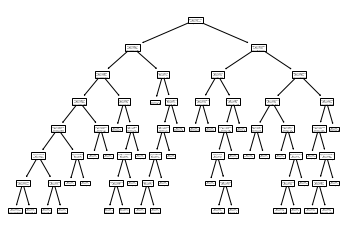

In [22]:
import graphviz 
from sklearn import tree
clf.fit(X_trainS,y_trainS)
tree.plot_tree(clf)

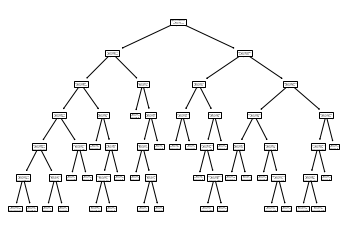

<Figure size 6400x4800 with 0 Axes>

In [171]:
from sklearn import tree
tree.plot_tree(clf.fit(X_trainS,y_trainS))
plt.figure(figsize=(80, 60), dpi=80)
plt.show()

[Text(188.08168604651163, 203.85, 'X[89] <= 1459036.812\ngini = 0.5\nsamples = 26733\nvalue = [26253, 25920]'),
 Text(125.06337209302326, 176.67000000000002, 'X[7] <= 46037.0\ngini = 0.089\nsamples = 24396\nvalue = [24374, 1188]'),
 Text(94.40581395348838, 149.49, 'X[42] <= 12288.0\ngini = 0.062\nsamples = 24336\nvalue = [24321, 810]'),
 Text(72.02093023255814, 122.31, 'X[0] <= 240517.0\ngini = 0.039\nsamples = 23881\nvalue = [23872, 486]'),
 Text(50.609302325581396, 95.13, 'X[32] <= 353987.0\ngini = 0.031\nsamples = 23818\nvalue = [23811, 378]'),
 Text(31.144186046511628, 67.94999999999999, 'X[93] <= 240448.0\ngini = 0.026\nsamples = 23812\nvalue = [23806, 324]'),
 Text(15.572093023255814, 40.77000000000001, 'X[17] <= 14877.0\ngini = 0.022\nsamples = 23783\nvalue = [23778, 270]'),
 Text(7.786046511627907, 13.590000000000003, 'gini = 0.018\nsamples = 23754\nvalue = [23750, 216]'),
 Text(23.35813953488372, 13.590000000000003, 'gini = 0.45\nsamples = 29\nvalue = [28, 54]'),
 Text(46.7162

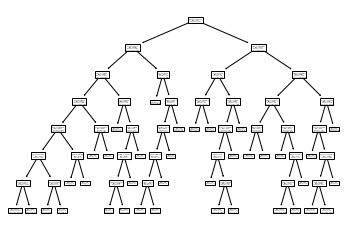

In [21]:
plt.figure(figsize=(20, 16))
plt.show()
tree.plot_tree(clf)

In [58]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
X_trainS.shape
lsvc = LinearSVC(class_weight={1: 55}).fit(X_trainS, y_trainS)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_trainS)
X_new.shape

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([[287230.8862163426, 0.0, 0.0, ..., 259712.0, 504.0, 0.0],
       [36.0, 0.0, 0.0, ..., 3948.0, 48.0, 0.0],
       [20.0, 0.0, 0.0, ..., 44.0, 0.0, 0.0],
       ...,
       [287230.8862163426, 0.0, 0.0, ..., 164450.0, 12556.0, 0.0],
       [287230.8862163426, 0.0, 0.0, ..., 387158.0, 720.0, 0.0],
       [287230.8862163426, 0.0, 448.0, ..., 6992462.0, 268280.0, 1200.0]],
      dtype=object)

<ipython-input-155-e94590502879>:5: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


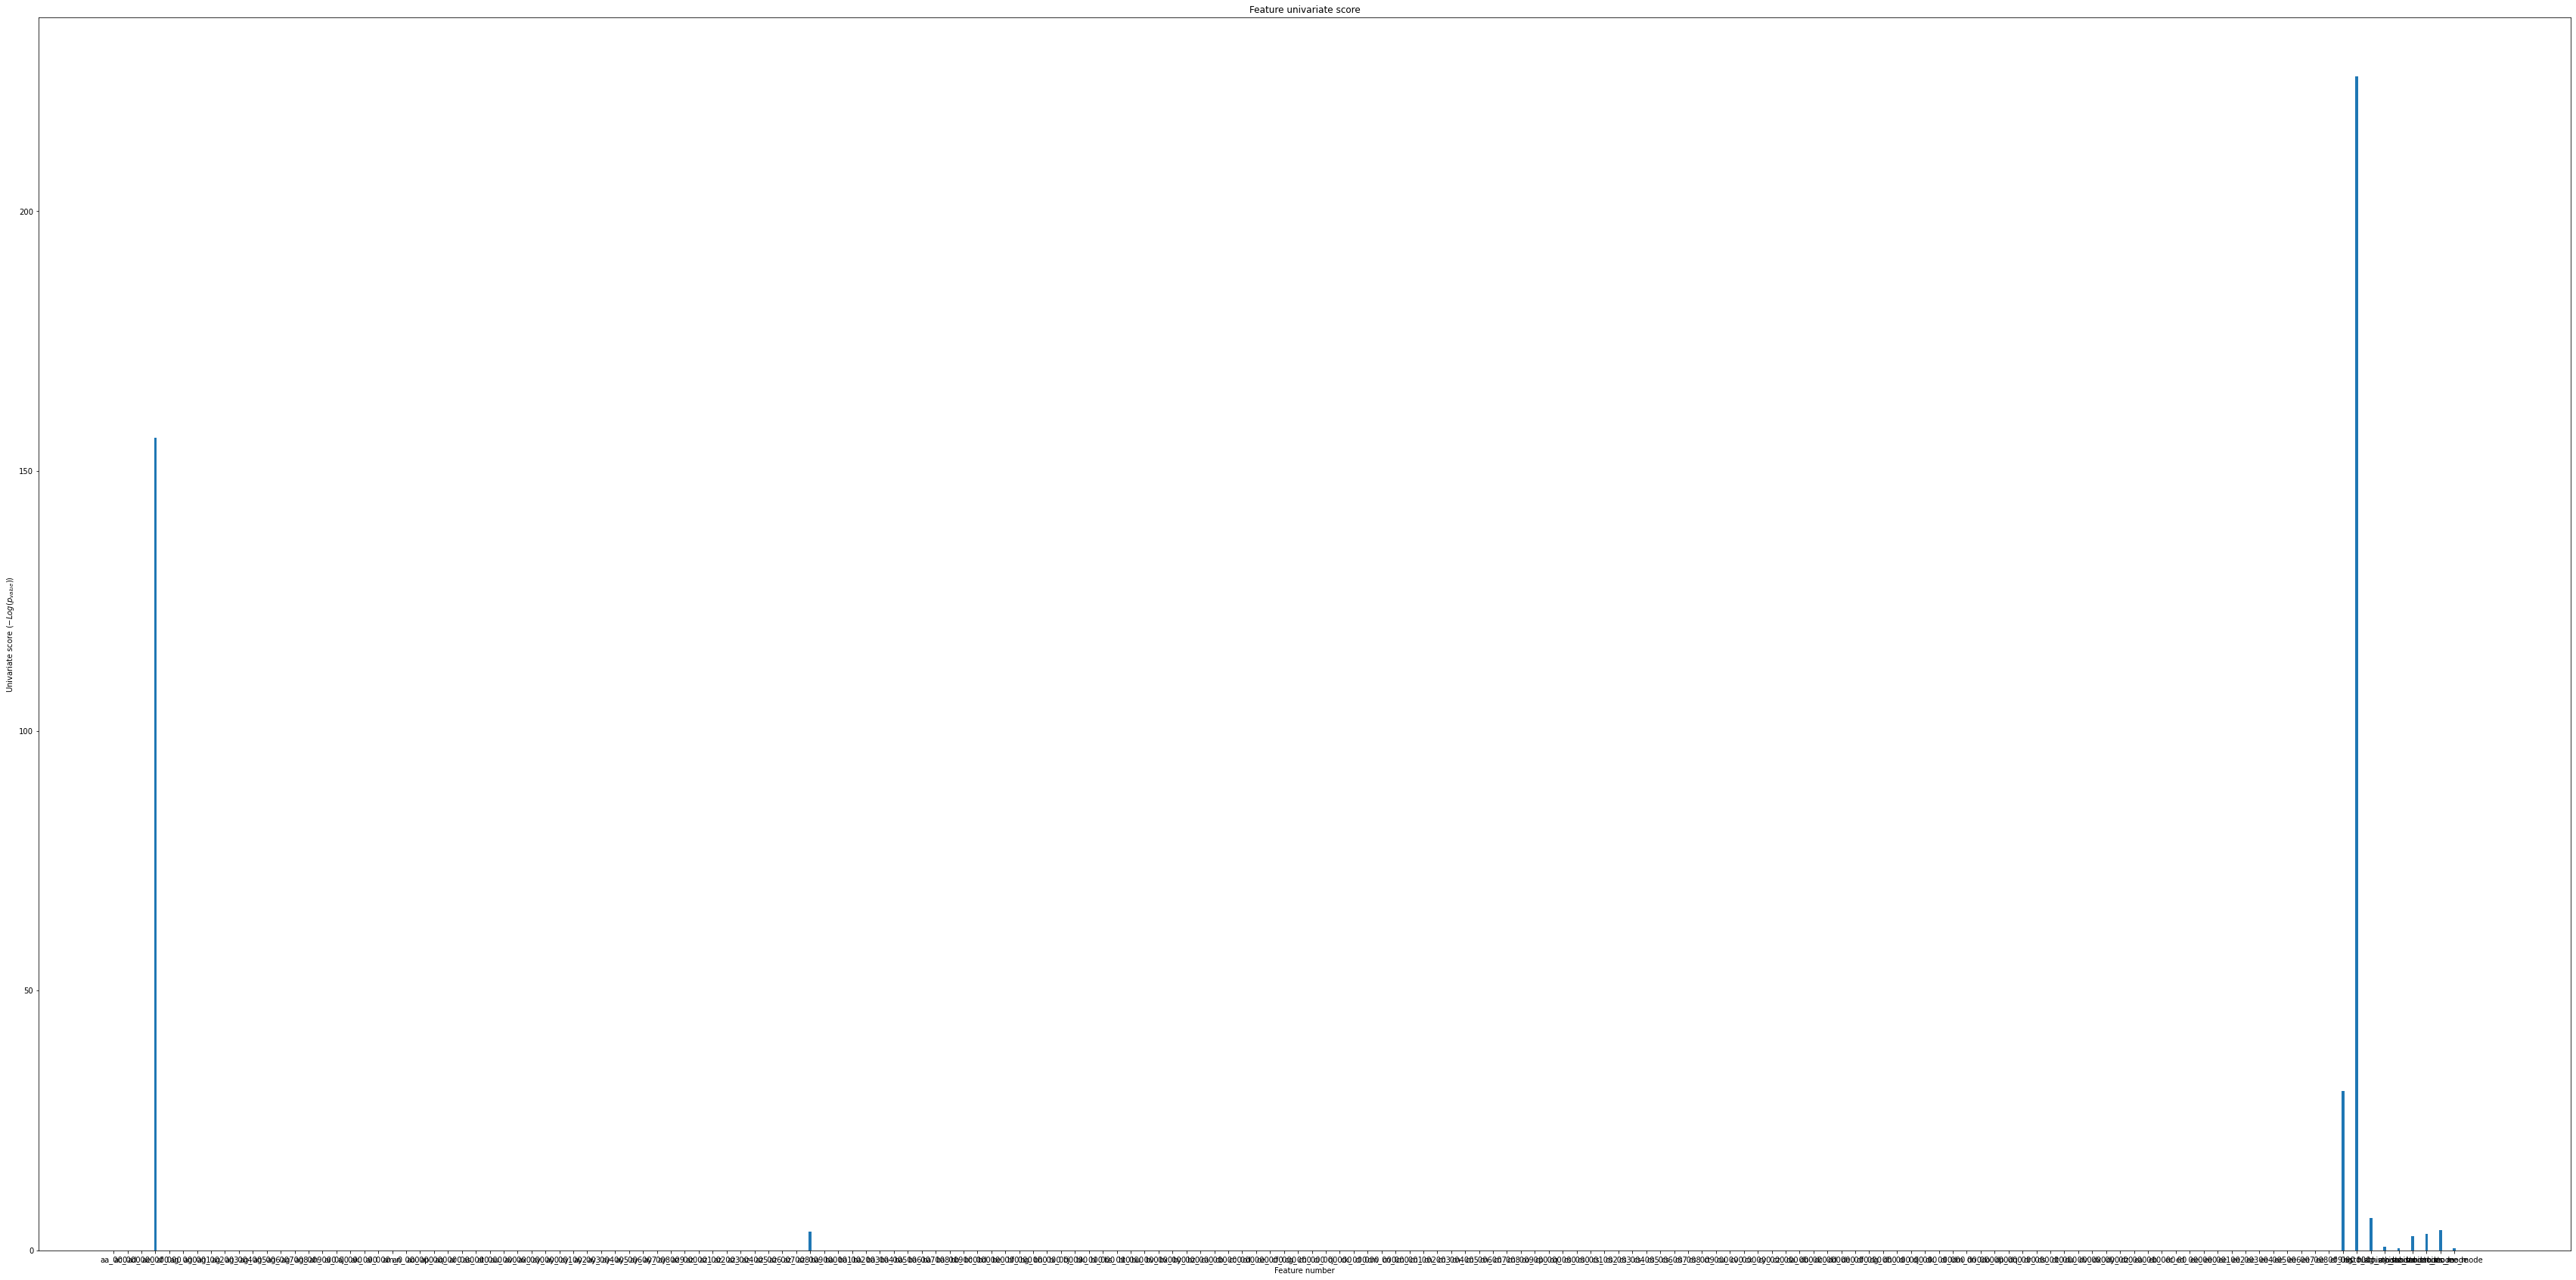

In [155]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

selector = SelectKBest(chi2, k=4)
selector.fit(X_trainS, y_trainS)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
import matplotlib.pyplot as plt

#X_indices = np.arange(X.shape[-1])
fig= plt.figure(figsize=(60,30))
#plt.figure(1)
plt.clf()
plt.bar(X_trainS.columns, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [85]:


clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_trainS, y_trainS)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        clf.score(X_trainS, y_trainS)
    )
)

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

Classification accuracy without selecting features: 0.992


In [211]:
clf_selected = make_pipeline(SelectKBest(chi2, k=105), MinMaxScaler(), LinearSVC(class_weight={1: 55}))
clf_selected.fit(X_trainS, y_trainS)
y_predS = clf_selected.fit(X_trainS, y_trainS).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
print(f_score)


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8355287918705308


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [212]:
y_pred = pipe.fit(X_train_p, y_train).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo105.csv', index=False)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [12]:
pipe = make_pipeline(SelectKBest(chi2, k=105), MinMaxScaler(), LinearSVC(class_weight={1: 70}))
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.81246182 0.81607795 0.81031308 0.81947012 0.78931013]


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [19]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB(fit_prior = True, class_prior = [0.1 , 0.9])
pipe = make_pipeline(MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.74593382 0.74945295 0.74527253 0.75900277 0.72349972]


In [313]:
clf = GaussianNB()
clf.fit(X_trainS, y_trainS, sample_weight = 0.9).predict(X_testS)
y_predict = clf.fit(X_trainS,y_trainS).predict(X_testS)
fbeta_score(y_testS, y_predict, beta = 3)

0.7692307692307692

In [154]:
y_pred = pipe.fit(X_train_p, y_train).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo103.csv', index=False)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [20]:
clf = DTC(criterion='gini', splitter='best', min_samples_split=20, max_depth=15, class_weight={1: 55})
pipe = make_pipeline(SelectKBest(chi2, k=100), MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.74542009 0.74514715 0.72632944 0.75373619 0.79589217]


In [21]:
clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None, class_weight={1: 55})
pipe = make_pipeline(SelectKBest(chi2, k=140), MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.8086904  0.81097197 0.81113801 0.83333333 0.7749535 ]


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [202]:
y_pred = pipe.fit(X_train_p, y_train).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo104.csv', index=False)

In [ ]:
clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None, class_weight={1: 55})
pipe = make_pipeline(SelectKBest(f_classif, k=60), MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

In [213]:
from sklearn.linear_model import SGDClassifier

In [266]:
clf = SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=10000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight={1: 60}, warm_start=False, average=False)
pipe = make_pipeline(MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.80438757 0.80408424 0.75083426 0.83073079 0.73622881]


In [267]:
y_pred = pipe.fit(X_train_p, y_train).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo106.csv', index=False)

In [314]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
pipe = make_pipeline(MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.76117318 0.67558058 0.74877537 0.70175439 0.64401982]


In [316]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)
#, max_depth=1, random_state=0
pipe = make_pipeline(MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.41364296 0.74235808 0.33691756 0.4029304  0.28127313]


In [248]:
from sklearn.model_selection import GridSearchCV
clf = SGDClassifier(loss='hinge', penalty='l2', l1_ratio=0.15, fit_intercept=True, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight={1: 60}, warm_start=False, average=False)
pipe = make_pipeline(StandardScaler(), clf)
parameters = {'alpha':10.0**-np.arange(1,7), 'max_iter':10**np.arange(1,7)}
fthree_scorer = make_scorer(fbeta_score, beta=3)
tune = GridSearchCV(clf, parameters, scoring=fthree_scorer)
tune.fit(X_train_p, y_train)
#GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before conv

AttributeError: 'SGDClassifier' object has no attribute 'cv_results_'

In [254]:
print(sorted(tune.cv_results_.keys()))
print(tune.best_params_)
print(tune.best_score_)

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_alpha', 'param_max_iter', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
{'alpha': 0.0001, 'max_iter': 10000}
0.605494210002486


In [52]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=20, max_depth=7, class_weight={1: 55})
lsvc = LinearSVC(class_weight={1: 54}).fit(X_trainS,y_trainS)
model = SelectFromModel(lsvc, prefit=True)
X_trainS_new = model.transform(X_trainS)
X_testS_new = model.transform(X_testS)
y_predict = clf.fit(X_trainS_new,y_trainS).predict(X_testS_new)
fbeta_score(y_predict, y_testS, beta = 3)


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.3659359190556492

In [24]:
X_train_pp = X_train_p
X_train_pp['c'] = y_train.values

In [25]:
count_class_0, count_class_1 = X_train_pp.c.value_counts()

# Divide by class
class_0 = X_train_pp[X_train_pp['c'] == 0]
class_1 = X_train_pp[X_train_pp['c'] == 1]

Random under-sampling:
0    722
1    722
Name: c, dtype: int64


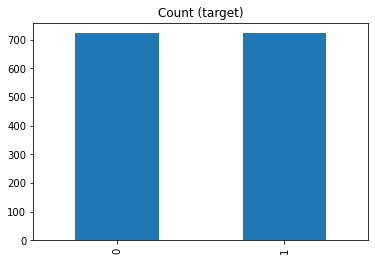

In [26]:
class_0_under = class_0.sample(count_class_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

print('Random under-sampling:')
print(test_under.c.value_counts())

test_under.c.value_counts().plot(kind='bar', title='Count (target)');

X_train_u = test_under.drop(c)
y_train_u = test_under.c.values

<AxesSubplot:title={'center':'Count (target)'}>

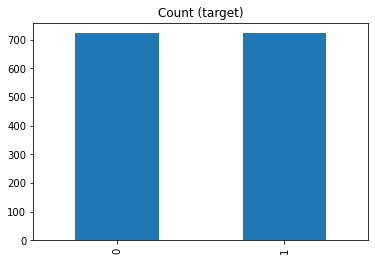

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_p, y_train)
y_rus.value_counts().plot(kind='bar', title='Count (target)')

<AxesSubplot:title={'center':'Count (target)'}>

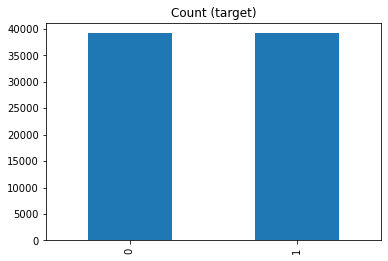

In [23]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train_p, y_train)
y_ros.value_counts().plot(kind='bar', title='Count (target)')

In [24]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_ros, y_ros, test_size=0.33, random_state=42)

In [31]:
clf = DTC(criterion='gini', splitter='best', min_samples_split=20, max_depth=7)
pipe = make_pipeline(SelectKBest(chi2, k=100), MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_rus, y_rus, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.91352859 0.94875346 0.93857833 0.91160221 0.91736695]


In [38]:
clf = GaussianNB()
pipe = make_pipeline(SelectKBest(chi2, k=100), MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_ros, y_ros, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.90952277 0.91352447 0.90635877 0.90530751 0.9158346 ]


In [35]:
y_pred = pipe.fit(X_ros, y_ros).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo112.csv', index=False)

In [32]:
clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
pipe = make_pipeline(SelectKBest(chi2, k=140), MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_ros, y_ros, cv=it, scoring = fthree_scorer)
print(cv_results)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.94238425 0.94405057 0.94806076 0.94547363 0.94950477]


In [33]:
y_pred = pipe.fit(X_ros, y_ros).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo111.csv', index=False)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.model_selection import cross_validate
from imblearn.ensemble import BalancedBaggingClassifier

clf = BalancedBaggingClassifier(sampler=RandomUnderSampler())
pipe = make_pipeline( clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

# Exactly Balanced Bagging
#ebb = BalancedBaggingClassifier(sampler=RandomUnderSampler())
#cv_results = cross_validate(ebb, X_train_p, y_train, scoring="balanced_accuracy")

#print(f"{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}")

[0.76026637 0.74618736 0.77610274 0.77136515 0.78250863]


In [ ]:
 Exactly Balanced Bagging
ebb = BalancedBaggingClassifier(sampler=RandomUnderSampler())
cv_results = cross_validate(ebb, X_train_p, y_train, scoring="balanced_accuracy")

print(f"{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}")

In [46]:
y_pred = pipe.fit(X_train_p, y_train).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo113.csv', index=False)

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_p)

In [17]:
clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
pipe = make_pipeline( clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_train_pca, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.55465805 0.51164567 0.52877138 0.54545455 0.47249908]


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

cc = ClusterCentroids(estimator=MiniBatchKMeans(), random_state=42)
X_cc, y_cc = cc.fit_resample(X_train_p, y_train)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [102]:
clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
pipe = make_pipeline(SelectKBest(chi2, k=140), MinMaxScaler(),clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_cc, y_cc, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.89965398 0.91352859 0.90277778 0.93555094 0.85915493]


In [98]:
y_pred = pipe.fit(X_cc, y_cc).predict(X_test_p_clustering)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo201.csv', index=False)

In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_p, y_train)

In [35]:
X_res_S, y_res_S = sm.fit_resample(X_trainS, y_trainS)

In [48]:
clf = LinearSVC()
pipe = make_pipeline(SelectKBest(chi2, k=105), MinMaxScaler(), clf)
#pipe.fit(X_res_S, y_res_S)
y_predS = pipe.fit(X_res_S, y_res_S).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
print(f_score)

0.8422664624808575


In [31]:
clf = LinearSVC()
pipe = make_pipeline(SelectKBest(chi2, k=105), MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_res, y_res, cv=it, scoring = fthree_scorer)
print(cv_results)


[0.95227735 0.95373984 0.95117985 0.94941734 0.95163707]


In [32]:
y_pred = pipe.fit(X_res, y_res).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo206.csv', index=False)

In [26]:
clf = GaussianNB()
pipe = make_pipeline(SelectKBest(chi2, k=100), MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_res, y_res, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.89448568 0.90007971 0.89825365 0.89887496 0.89684541]


In [27]:
y_pred = pipe.fit(X_res, y_res).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo204.csv', index=False)

In [108]:
clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None, class_weight={1: 55})
pipe = make_pipeline(SelectKBest(chi2, k=140), MinMaxScaler(),clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_res, y_res, cv=it, scoring = fthree_scorer)
print(cv_results)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.9791463  0.97892471 0.97888531 0.98010225 0.98014407]


In [110]:
y_pred = pipe.fit(X_res, y_res).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo203.csv', index=False)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
X_test_p_clustering = X_test_p.assign(clust = test_clustering)

In [96]:
X_test_p_clustering

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ef_000,eg_000,histo_ag_mode,histo_ay_mode,histo_az_mode,histo_ba_mode,histo_cn_mode,histo_cs_mode,histo_ee_mode,clust
0,240,4.200000e+01,26.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,9758.0,...,0.0,0.0,5,8,6,0,3,5,0,8
1,82082,2.320000e+02,230.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1096.0,...,0.0,0.0,6,7,4,0,5,5,1,0
2,39670,2.130706e+09,210.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,11162.0,...,0.0,0.0,6,6,5,1,4,5,0,1
3,39398,6.400000e+01,432.348214,0.000000,0.000000,0.0,0.0,0.0,94756.0,1637846.0,...,0.0,0.0,5,7,5,0,4,5,0,8
4,263566,3.553824e+08,432.348214,7.068117,11.098418,0.0,0.0,19700.0,608636.0,5100340.0,...,0.0,0.0,5,8,5,0,4,5,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17095,2,8.000000e+00,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,6,8,5,0,4,5,0,8
17096,28,2.130706e+09,20.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,128.0,...,0.0,0.0,6,6,5,0,4,6,0,1
17097,14,1.000000e+01,10.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,126.0,...,0.0,0.0,6,8,5,0,4,6,0,8
17098,38164,3.200000e+02,248.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,10600.0,...,0.0,0.0,6,7,5,0,5,5,0,8


In [89]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=16).fit(X_train_p)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [90]:
test_clustering = KMeans(n_clusters=16).fit(X_train_p).predict(X_test_p)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [69]:
X_train_p_clustering = X_train_p.assign(clust = clustering.labels_)
X_test_p_clustering = X_test_p.assign(clust = test_clustering)

In [87]:
X_train_p

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ef_000,eg_000,histo_ag_mode,histo_ay_mode,histo_az_mode,histo_ba_mode,histo_cn_mode,histo_cs_mode,histo_ee_mode,clust
0,21470,2.130706e+09,168.000000,0.0,0.0,0.0,0.0,0.0,11968.0,723426.0,...,0.0,0.0,4,8,6,0,3,5,6,0
1,40856,5.540000e+02,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3310.0,...,0.0,0.0,6,6,4,0,5,5,1,1
2,28,2.130706e+09,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,80.0,...,0.0,0.0,6,6,5,0,5,6,0,0
3,38682,3.440000e+02,326.000000,0.0,0.0,0.0,0.0,0.0,0.0,418.0,...,0.0,0.0,6,8,4,1,5,5,0,1
4,62218,0.000000e+00,287230.886216,0.0,0.0,0.0,0.0,0.0,0.0,153220.0,...,0.0,0.0,6,7,4,1,4,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39895,27012,6.840000e+02,524.000000,0.0,0.0,0.0,0.0,0.0,2864.0,1384726.0,...,0.0,0.0,4,8,5,0,3,5,7,1
39896,1926,2.130706e+09,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,38.0,...,0.0,0.0,7,7,5,1,5,5,5,0
39897,712,9.800000e+01,62.000000,0.0,0.0,0.0,0.0,0.0,802.0,37042.0,...,0.0,0.0,4,7,5,0,4,6,0,1
39898,61980,3.060000e+02,226.000000,0.0,0.0,0.0,0.0,0.0,0.0,244.0,...,0.0,0.0,6,6,4,0,4,5,8,1


<AxesSubplot:title={'center':'Count (target)'}>

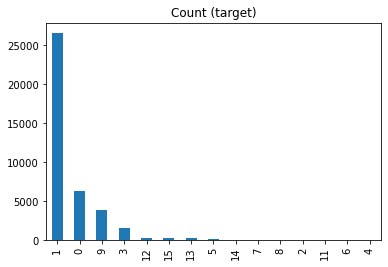

In [91]:
X_train_p_clustering['clust'][y_train == 0].value_counts().plot(kind='bar', title='Count (target)')

<AxesSubplot:title={'center':'Count (target)'}>

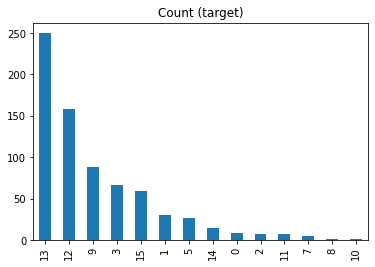

In [92]:
X_train_p_clustering['clust'][y_train == 1].value_counts().plot(kind='bar', title='Count (target)')

In [72]:
clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None, class_weight={1: 55})
pipe = make_pipeline( SelectKBest(chi2, k=140), MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_train_p_clustering, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.8086904  0.81097197 0.81113801 0.83333333 0.7749535 ]


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
clf = DTC(criterion='gini', splitter='best', min_samples_split=15, max_depth=5, class_weight={1: 55})
pipe = make_pipeline(MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_train_p_clustering, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.74418605 0.74054054 0.73157316 0.79722704 0.7150655 ]


In [75]:
from sklearn.tree import export_text
tree_rules = export_text(clf.fit(X_train_p_clustering, y_train), feature_names=list(X_train_p_clustering.columns))
print(tree_rules)

|--- ck_000 <= 1459341.62
|   |--- aa_000 <= 183106.00
|   |   |--- az_001 <= 17240.00
|   |   |   |--- ay_001 <= 92387.00
|   |   |   |   |--- cn_009 <= 13147.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- cn_009 >  13147.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- ay_001 >  92387.00
|   |   |   |   |--- ba_009 <= 85.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ba_009 >  85.00
|   |   |   |   |   |--- class: 1
|   |   |--- az_001 >  17240.00
|   |   |   |--- cn_002 <= 30107.00
|   |   |   |   |--- class: 0
|   |   |   |--- cn_002 >  30107.00
|   |   |   |   |--- cm_000 <= 1615.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- cm_000 >  1615.00
|   |   |   |   |   |--- class: 0
|   |--- aa_000 >  183106.00
|   |   |--- ck_000 <= 1171435.19
|   |   |   |--- az_000 <= 9451.00
|   |   |   |   |--- bt_000 <= 122195.49
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- bt_000 >  122195.49
|   |   |   |   |   |--- class: 0
|   |   |   |--- az_000

In [76]:
clf = GaussianNB()
pipe = make_pipeline(MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_train_p_clustering, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.75073314 0.77057793 0.74810053 0.79976649 0.74272133]
